# 11wk-2: 마코프체인 (9)

최규빈  
2023-05-16

# 강의영상

`-` 수업시간 중 잘못 설명한 부분이 있어서 정정하고 촬영하였습니다.
(두번째 영상이 재촬영한 부분임)

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-wygptXg6WEfudbDb-ZjvRm>

# imports

In [8]:
import numpy as np

# 예비학습 (동치류)

## intro

`-` 같다(=) 라는 개념의 추상화

`-` 예시1: 아래의 리스트에서 같은 원소끼리 묶어라.

In [18]:
[1,1,2,2,3,3,3]

In [19]:
[[1,1], [2,2], [3,3,3]]

> 같은 원소들의 모임을 동치류 (equivalence class) 라고 한다. 이
> 예제에서는 3개의 동치류가 있는 셈.

`-` 예시2: 아래의 리스트에서 같은 원소끼리 묶어라.

In [43]:
lst = [1, 1.0, 2, 2, 3, 3, 3]
lst 

-   어떻게 할까? (수학적으로 볼까? 프로그래밍적으로 볼까?)
-   같다라는건 뭐지?

## “같다”의 개념을 추상화

`-` “같다”라는 개념을 좀 일반화 해보자.

-   같다라는 것은 “어떠한 기준으로 판단하였을 경우” 그 결과가 같은
    집합으로 묶인다는 것을 의미

`-` 아래의 예시를 다시 관찰하자.

In [44]:
lst = [1, 1.0, 2, 2, 3, 3, 3]
lst 

(경우1)

판단기준을 “수학적인 값이 같음”으로 설정한다면 `lst[0]`과 `lst[1]`은
같다.

In [47]:
lst[0] == lst[1]

따라서 아래와 같은 분류가 합리적이다.

In [37]:
[[1, 1.0], [2,2], [3,3,3]]

(경우2)

판단기준을 “수학적인 값이 같음 & 파이썬에서의 자료형이 일치” 로
설정한다면 `lst[0]`과 `lst[1]`은 다르다.

In [48]:
type(lst[0]) == type(lst[1])

따라서 아래와 같은 분류가 합리적이다.

In [40]:
[[1], [1.0], [2,2], [3,3,3]]

(경우3)

판단기준을 “파이썬에서의 자료형이 일치” 로 설정한다면? 아래와 같은
분류도 합리적이다.

In [41]:
[[1,2,2,3,3,3], [1.0]]

이것도 어떠한 의미에서는 같은원소들을 모아놓은 것임

> “같다”라는 것을 올바르게 지칭하려면 “어떠한 의미에서 같다”라는 것인지
> 명확하게 설명할 필요가 있다.

`-` 예시2: $a$와 $b$가 “어떠한 의미에서 같다”라는 것을 기호로
$a \sim b$라고 하자. `~`의 의미를

-   $a \sim b$ $\overset{def}{\Leftrightarrow}$ a == b

로 해석한다면, 아래와 같이 원소를 묶을 수 있다.

In [37]:
[[1, 1.0], [2,2], [3,3,3]]

만약에 `~`의 의미를

-   $a \sim b$ $\overset{def}{\Leftrightarrow}$ (a == b) &
    (type(a)==type(b))

로 해석한다면, 아래와 같이 원소를 묶을 수 있다.

In [40]:
[[1], [1.0], [2,2], [3,3,3]]

만약에 `~`의 의미를

-   $a \sim b$ $\overset{def}{\Leftrightarrow}$ (type(a)==type(b))

로 해석한다면, 아래와 같이 원소를 묶을 수 있다.

In [41]:
[[1,2,2,3,3,3], [1.0]]

`-` “같음(=)”이라는 기호가 가지는 당연한 성질

1.  $a=a$
2.  $a=b \Rightarrow b=a$
3.  $a=b, b=c \Rightarrow a=c$

성질 1,2,3은 원래 `=`라는 기호가 “두 원소의 같음”을 의미할때 가지는
당연한 성질이다.

`-` 역으로 생각해보면 어떠한 기호 $\sim$이 성질 1,2,3을 가진다면 기호
$\sim$를 같음을 의미하는 기호로 “해석”할 수 있다.

-   예시1: 합동
-   예시2: 닮음

`-` **정의:** 어떠한 집합 $\Omega$의 임의의 원소 $a,b,c$ 에 대하여
$\sim$이 아래와 같은 성질이 성립한다면 $\sim$를 equivalence relation
이라고 부른다.

1.  $a\sim~a$
2.  $a \sim b \Rightarrow b\sim a$
3.  $a \sim b, b \sim c \Rightarrow a \sim c$

여기에서 $\sim$은 “같음”을 의미하는 기호 $=$의 일반화된 버전이다.

`-` **정의:** 어떠한 집합 $\Omega$가 equivalence relation $\sim$를
가진다면 그 집합은 $\sim$를 기준으로 나눌 수 있다.

(예시1) 아래와 같이 5명의 학생이 있다고 치자.

-   23학번: 20살, 20살, 20살
-   22학번: 21살, 21살

구성원들의 나이나 학번이 같으면 반말을 한다고 치자. (그렇지 않으면
존대말을 한다고 가정하자) 이제 아래와 같은 기호를 정의하자.

-   $a \sim b$ $\overset{def}{\Leftrightarrow}$ $a$가 $b$에게 반말함

그렇다면 $\sim$ equivalence relation 이다. 따라서 학생들을 $\sim$를
기준으로 두개의 그룹으로 나눌 수 있다.

(예시2) 아래와 같이 5명의 학생이 있다고 치자.

-   23학번: 20살, 20살, 21살
-   20학번: 23살, 23살

여전히 $\sim$는 equivalence relation 이다. 따라서 학생들을 $\sim$를
기준으로 두개의 그룹으로 나눌 수 있다.

(예시3) 아래와 같이 5명의 학생이 있다고 치자.

-   23학번: 20살, 20살, 21살
-   22학번: 21살, 21살

이제 $\sim$는 equivalence relation 이 아니다. 따라서 학생들을 $\sim$를
기준으로 나눌 수 없다.

# Irreducible (IRR)

## intro

`-` 질문: “오른쪽으로만 갈래요” 예제는 IRR HMC 인가?

`-` **가짜정의**: 어떠한 HMC $\{X_t\}$가 IRR이라는 것은 모든 상태공간이
“연결”되어있다는 의미이다.

`-` 가짜정의의 보충설명 (1)

-   여기에서 모든 상태공간이 연결되어있다는 의미는 상태공간 $E$에서
    임의의 두 상태 $i,j$를 뽑았을때 $i \to j$ 이고, $j \to i$ 라는
    의미이다.
-   여기에서 $i\to j$ 라는 의미는 **언젠가는** 상태 $i$에서 출발한
    체인이 상태 $j$에 도달할 수 있다는 의미이다.

`-` 의문: **언젠가는**에 대한 의미??

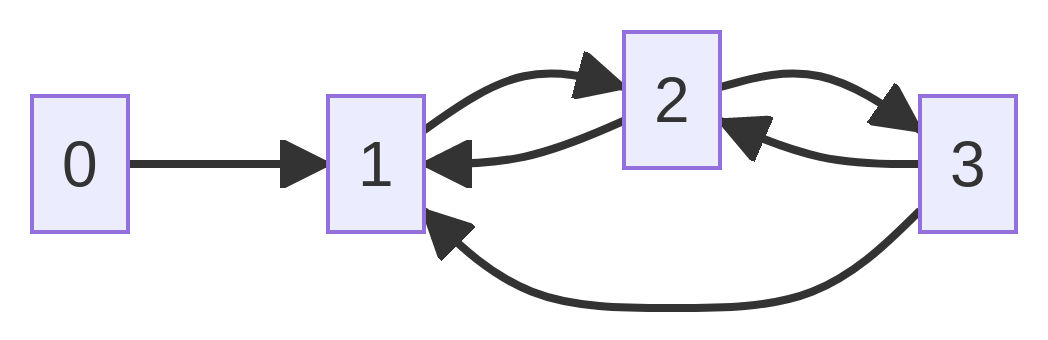

상태0에서 시작하면 3회 이후에는 상태3에 갈 확률이 있다. (3회시점에 꼭
상태3에 있겠다는 의미는 아님) 따라서 이 경우

$$0 \to 3$$

이라고 쓸 수 있다. 이 예제의 경우

-   $0 \to 1$, $0 \to 2$, $0 \to 3$, $0 \to 4$, $0\to 0$[1]
-   $1 \to 1$, $1 \to 2$, $1 \to 3$
-   $2 \to 1$, $2 \to 2$, $2 \to 3$
-   $3 \to 1$, $3 \to 2$, $3 \to 3$

와 같다.

> 여기서 제가 설명잘못했는데요, 0회도 포함시킨다고 하면 $0 \to 0$
> 입니다.

`-` 다시 가짜정의의 보충설명 (2) – (1)을 이어서

-   여기에서 모든 상태공간이 연결되어있다는 의미는 상태공간 $E$에서
    임의의 두 상태 $i,j$를 뽑았을때 $i \to j$ 이고, $j \to i$ 라는
    의미이다.
-   여기에서 $i\to j$ 라는 의미는 언젠가는 상태 $i$에서 출발한 체인이
    상태 $j$에 도달할 수 있다는 의미이다.
-   즉 $i \to j$라는 의미는 **“($i$에서 출발한다면 $T_0$ 이후에 $j$에
    도달해 있을 확률) \> $0$”** 이라는 뜻이다.

`-` 다시의문: $i$에서 출발했다고 가정할때 $T_0$이후에 $j$에 도달해 있을
확률을 어떻게 구체적으로 쓰지?

`-` (예시)

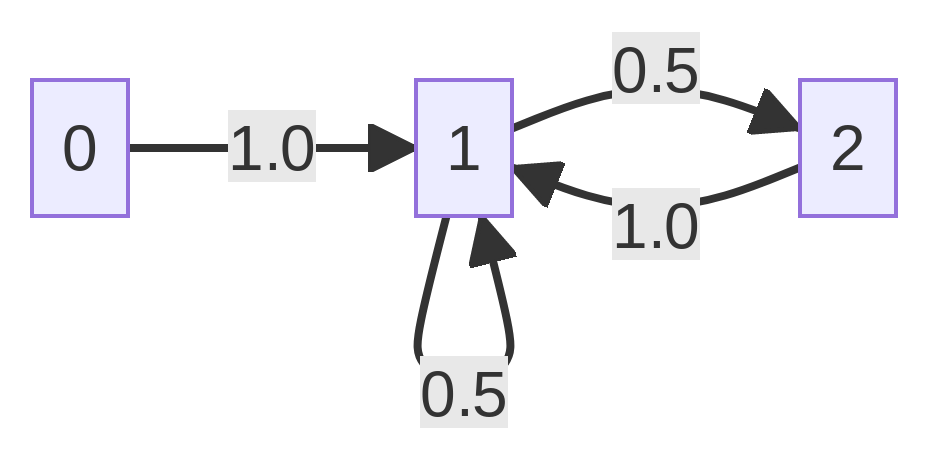

질문: $p_{ij}^{(T_0)}$를 “$i$에서 출발했다고 가정할때 $T_0$이후에 $j$에
도달해 있을 확률이라고 하자.” $T_0=2$일 경우 아래를 구하라.

-   $p_{00}^{(2)}=0$
-   $p_{01}^{(2)}=0.5$
-   $p_{02}^{(2)}=0.5$
-   $p_{10}^{(2)}=0$
-   $p_{11}^{(2)}=?$
-   $p_{12}^{(2)}=?$
-   $p_{20}^{(2)}=0$
-   $p_{21}^{(2)}=0.5$
-   $p_{22}^{(2)}=0.5$

[1] 0회도 포함시키면 $0\to 0$ 라고 볼 수 있음.

In [11]:
P = np.array([[0,1,0],
              [0,1/2,1/2],
              [0,1,0]])
P@P

`-` 다시 가짜정의의 보충설명 (3) – (2)를 이어서

-   여기에서 모든 상태공간이 연결되어있다는 의미는 상태공간 $E$에서
    임의의 두 상태 $i,j$를 뽑았을때 $i \to j$ 이고, $j \to i$ 라는
    의미이다.
-   여기에서 $i\to j$ 라는 의미는 언젠가는 상태 $i$에서 출발한 체인이
    상태 $j$에 도달할 수 있다는 의미이다.
-   즉 $i \to j$라는 의미는 **“($i$에서 출발한다면 $T_0$ 이후에 $j$에
    도달해 있을 확률) \> $0$”** 이라는 뜻이다.  
-   즉 $i \to j$라는 의미는 “$\exists T_0 \in \mathbb{N}_0$ such that
    $p_{ij}^{(T_0)}>0$” 이라는 뜻이다.

> 이 부분도 제가 설명을 잘못했는데 여기에서 $T_0=0$ 인 경우는
> ${\bf P}^{0}={\bf I}$ 와 같이 해석합니다. 따라서 모든
> $\forall x \in E:~ x\leftrightarrow x$ 입니다.

## 정의: irreducible (IRR)

`-` **정의**: $\{X_t\}$를 상태공간 $E$에 정의된 HMC라고 하고 ${\bf P}$를
$\{X_t\}$의 transition matrix (혹은 그 비슷한 것) 라고 하자. 임의의
$i,j \in S$에 대하여 상태 $i$에서 상태 $j$로 도달가능(accessible)하다는
의미는

-   $\exists T_0 \in \mathbb{N}_0$ such that $p_{ij}^{(T_0)}>0$

를 의미하며 이를 기호로는 $i\to j$와 같이 표현한다. 참고로 여기에서
$p_{ij}^{(T_0)}$는 ${\bf P}^{T_0}$의 $(i,j)$-th element이다.

`-` 따라서 아래는 모두 같은 의미임

-   $\exists T_0 \in \mathbb{N}_0 \textsf{ such that } p_{ij}^{(T_0)}>0$
-   $i \to j$
-   $j$ is accessible from $i$

`-` **정의**: $\{X_t\}$를 상태공간 $E$에 정의된 HMC라고 하고 ${\bf P}$를
$\{X_t\}$의 transition matrix (혹은 그 비슷한 것) 라고 하자. 임의의
$i,j \in S$에 대하여 상태 $i,j$가 상호도달가능 (communicate) 하다는
의미는

-   $i \to j$ and $j \to i$

임을 의미한다. $i,j$가 상호도달할 경우 기호로는 $i \leftrightarrow j$ 와
같이 표현한다.

`-` 이론: 아래가 성립한다. (굳이 증명할 필요없음. 결과만 기억해도 OK)

-   $i \leftrightarrow i$
-   $i \leftrightarrow j$ $\Rightarrow$ $j \leftrightarrow i$
-   $i \leftrightarrow j$, $j \leftrightarrow k$ $\Rightarrow$
    $i \leftrightarrow k$

따라서 $\leftrightarrow$ 는 equivalence relation 이다. 따라서 상태공간
$E$는 $\leftrightarrow$를 기준으로 “나눌 수” 있다.

`-` **정의:** $\{X_t\}$를 상태공간 $E$에 정의된 HMC라고 하자. 상태공간
$E$는 equivalence relation $\leftrightarrow$를 기준으로

$$E = E_1 \uplus E_2 \uplus \dots$$

와 같이 “나눌 수” 있는데 이때 나누어진 집합 $E_1,E_2,\dots$ 를
communication class라고 부른다.

`-` 예시1: 상태공간을 $\{0\}$와 $\{1,2\}$로 나눌 수 있다. 따라서 $E$는
2개의 communication class 를 가진다.

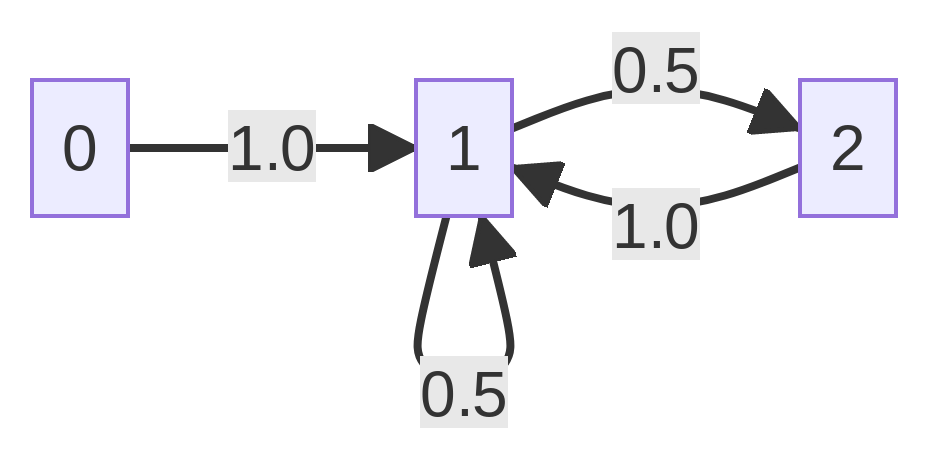

`-` 예시2: 아래와 같은 transition matrix를 가지는 마코프체인의 경우

In [49]:
P = np.array([[1,0],
              [0,1]])
P

상태공간을 $\{0\},\{1\}$로 나눌 수 있다. 따라서 $E$는 2개의
communication class 를 가진다.

`-` **정의** $\{X_t\}$를 상태공간 $E$에 정의된 HMC라고 하고 ${\bf P}$를
$\{X_t\}$의 transition matrix (혹은 그 비슷한 것) 라고 하자. 상태공간
$E$가 오직 하나의 communication class를 가지는 경우 아래와 같이 말한다.

-   $\{X_t\}$ 가 irreducible 한 마코프체인이다.
-   ${\bf P}$ 가 irreducible 한 transition matrix 이다.